In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("talk")

In [2]:
rfm = pd.read_csv("rfm_segmented.csv")
rfm.head()

/tmp/ipython-input-14681611.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  rfm = pd.read_csv("rfm_segmented.csv")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,At Risk Customers
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,High Value Customers
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,High Value Customers
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,High Value Customers
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,High Value Customers


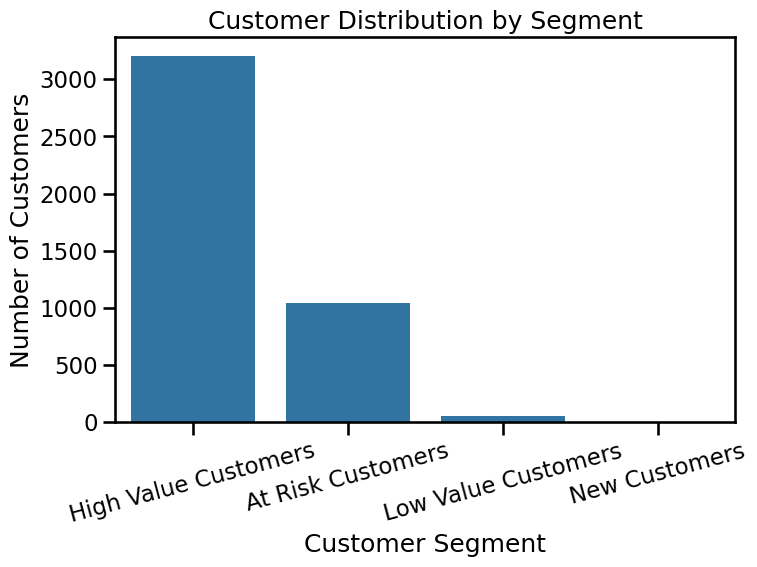

In [3]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index)
plt.title("Customer Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()

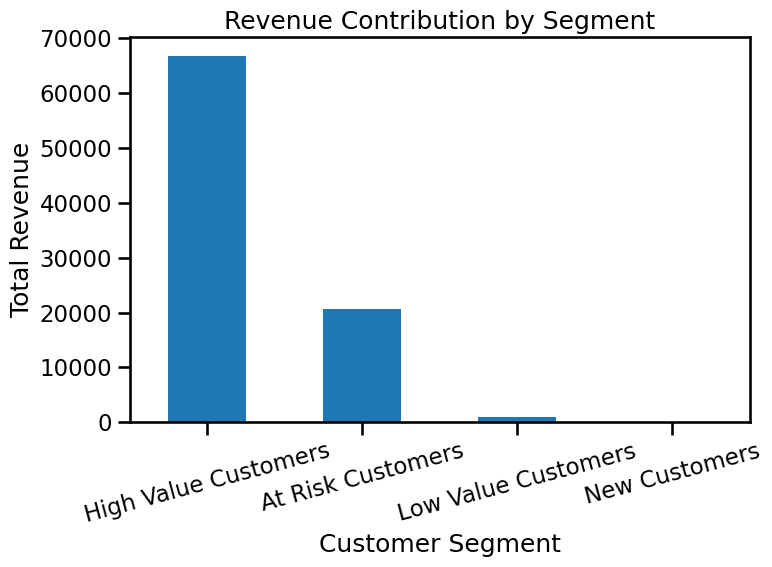

In [5]:
revenue_segment = rfm.groupby("Segment")["TotalPrice"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
revenue_segment.plot(kind="bar")
plt.title("Revenue Contribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.xticks(rotation=15)
plt.show()

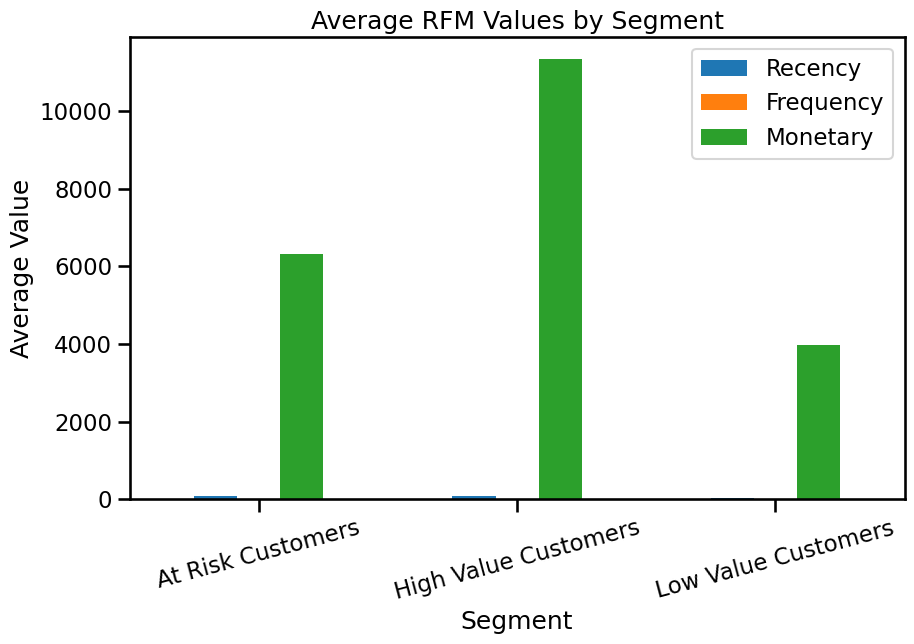

In [12]:
rfm_avg = rfm_final.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()

rfm_avg.plot(kind="bar", figsize=(10,6))
plt.title("Average RFM Values by Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=15)
plt.show()

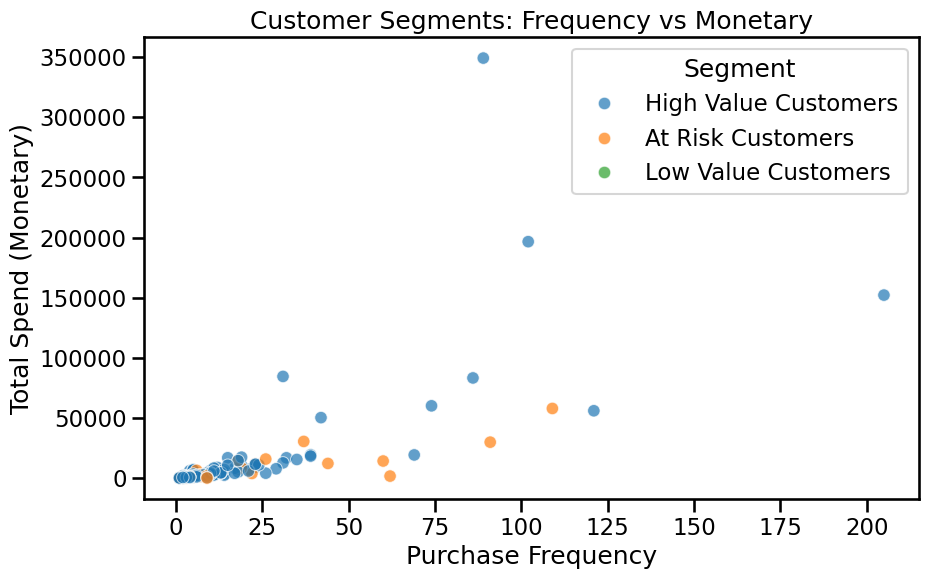

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm_final,
    x="Frequency",
    y="Monetary",
    hue="Segment",
    alpha=0.7
)
plt.title("Customer Segments: Frequency vs Monetary")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spend (Monetary)")
plt.show()

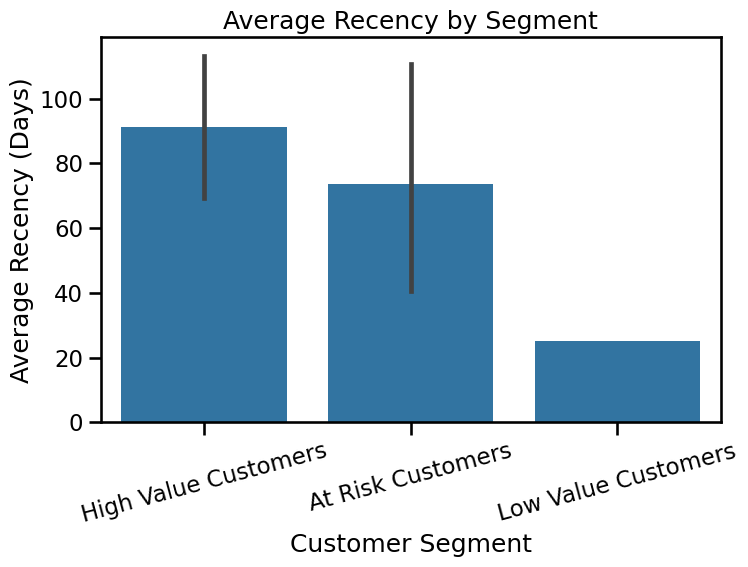

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=rfm_final,
    x="Segment",
    y="Recency",
    estimator="mean"
)
plt.title("Average Recency by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Recency (Days)")
plt.xticks(rotation=15)
plt.show()

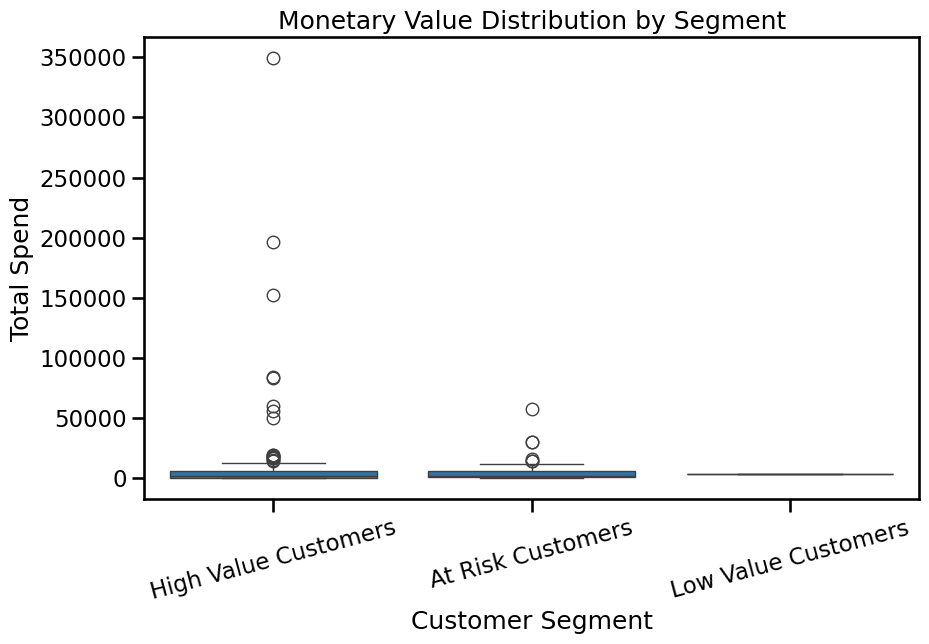

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=rfm_final, x="Segment", y="Monetary")
plt.title("Monetary Value Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Spend")
plt.xticks(rotation=15)
plt.show()

In [20]:
total_customers = rfm["Customer ID"].nunique()
total_revenue = rfm_final["Monetary"].sum()
avg_recency = rfm_final["Recency"].mean()
avg_frequency = rfm_final["Frequency"].mean()

print("Total Customers:", total_customers)
print("Total Revenue:", round(total_revenue,2))
print("Avg Recency:", round(avg_recency,2))
print("Avg Frequency:", round(avg_frequency,2))

Total Customers: 4312
Total Revenue: 8832003.27
Avg Recency: 91.17
Avg Frequency: 4.46
